In [17]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
address = '~/Documents/untitled.csv'
insur = pd.read_csv(address)

In [5]:
insur.head(20)

,Salary Grade,Segment,Unplanned Shrink Pct,Planned Shrink Pct,Avg Unadjusted Adherence Pct,Avg ACW,Avg Handle Time,Avg Inbound Talk Time,Hold Time Pct,Num Inbound,...,Time Aux2,Time Aux3,Time Aux4,Time Aux6,Time Aux5,Time Aux7,Time Aux8,Time Login,EmploymentDate,EmployeeID_2
0,29.0,FDS,8.814193,34.013132,78.593396,4.648122,12.624061,7.975939,6.735367,701,...,1022.066653,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990,11/2/15,usw9062aad1
1,30.0,FDS,8.994043,35.573911,71.054286,3.399823,10.954637,7.554815,15.763677,1222,...,1487.766655,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990,11/2/15,usw9074aad4
2,29.0,FDS,10.713797,27.673321,81.248113,3.503166,12.331533,8.828367,15.185973,1074,...,1641.999985,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650,7/24/17,usw9022aad8
3,28.0,SPSO,5.067218,48.948638,90.421489,0.895973,5.999292,5.103319,17.884134,1130,...,529.583325,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320,11/30/15,usw9051abw5
4,29.0,SPSO,1.898938,67.186997,92.030714,0.511770,5.211268,4.699498,16.180222,531,...,273.883330,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329,11/30/15,usw9092abw5
5,29.0,SPSO,2.811161,42.063459,83.798333,0.499741,4.788709,4.288967,9.669873,1417,...,654.249991,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650,12/7/15,usw9065ada9
6,30.0,SPSO,7.629961,60.648407,89.861429,0.350502,4.654610,4.304108,13.115598,564,...,244.049996,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996,12/7/15,usw9046ada9
7,30.0,SPSO,7.992044,32.330116,88.313333,0.929945,4.640582,3.710637,6.401854,2858,...,1865.849983,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650,12/7/15,usw9049adc7
8,29.0,SPSO,22.782705,13.858093,69.995455,0.867359,3.881471,3.014112,5.886034,698,...,214.249997,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995,12/7/15,usw9035add2
9,28.0,SPSO,18.563213,15.555765,81.204545,0.843851,5.038380,4.194529,5.690194,1179,...,456.299994,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327,12/7/15,usw9043add3


In [6]:
insur.columns = ['salary', 'segment', 'unplan_shrink', 'plan_shrink', 'avg_un_ad', 'acw', 'handle_time', 'inbound_time', 'hold_time', 'num_inbound', 'num_outbound', 'cold_trans', 'warm_trans', 'aux_unspec', 'aux_nonphone', 'aux_break', 'aux_pers', 'aux_mtg', 'aux_train', 'aux_corp', 'aux_comp', 'aug_mgmt', 'time_log', 'emp_start', 'id']

In [7]:
insur.head(20)

,salary,segment,unplan_shrink,plan_shrink,avg_un_ad,acw,handle_time,inbound_time,hold_time,num_inbound,...,aux_break,aux_pers,aux_mtg,aux_train,aux_corp,aux_comp,aug_mgmt,time_log,emp_start,id
0,29.0,FDS,8.814193,34.013132,78.593396,4.648122,12.624061,7.975939,6.735367,701,...,1022.066653,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990,11/2/15,usw9062aad1
1,30.0,FDS,8.994043,35.573911,71.054286,3.399823,10.954637,7.554815,15.763677,1222,...,1487.766655,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990,11/2/15,usw9074aad4
2,29.0,FDS,10.713797,27.673321,81.248113,3.503166,12.331533,8.828367,15.185973,1074,...,1641.999985,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650,7/24/17,usw9022aad8
3,28.0,SPSO,5.067218,48.948638,90.421489,0.895973,5.999292,5.103319,17.884134,1130,...,529.583325,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320,11/30/15,usw9051abw5
4,29.0,SPSO,1.898938,67.186997,92.030714,0.511770,5.211268,4.699498,16.180222,531,...,273.883330,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329,11/30/15,usw9092abw5
5,29.0,SPSO,2.811161,42.063459,83.798333,0.499741,4.788709,4.288967,9.669873,1417,...,654.249991,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650,12/7/15,usw9065ada9
6,30.0,SPSO,7.629961,60.648407,89.861429,0.350502,4.654610,4.304108,13.115598,564,...,244.049996,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996,12/7/15,usw9046ada9
7,30.0,SPSO,7.992044,32.330116,88.313333,0.929945,4.640582,3.710637,6.401854,2858,...,1865.849983,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650,12/7/15,usw9049adc7
8,29.0,SPSO,22.782705,13.858093,69.995455,0.867359,3.881471,3.014112,5.886034,698,...,214.249997,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995,12/7/15,usw9035add2
9,28.0,SPSO,18.563213,15.555765,81.204545,0.843851,5.038380,4.194529,5.690194,1179,...,456.299994,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327,12/7/15,usw9043add3


In [8]:
insur.sum()

salary                                                       36163
segment          FDSFDSFDSSPSOSPSOSPSOSPSOSPSOSPSOSPSOSPSOSPSOB...
unplan_shrink                                              13639.5
plan_shrink                                                29116.7
avg_un_ad                                                  95925.4
acw                                                        3287.89
handle_time                                                13307.8
inbound_time                                               10019.9
hold_time                                                    18717
num_inbound                                                1406773
num_outbound                                                185770
cold_trans                                                 9080.91
warm_trans                                                 5331.87
aux_unspec                                             1.30713e+06
aux_nonphone                                           2.28216

In [9]:
insur['time_sum'] = insur['unplan_shrink'] + insur['plan_shrink'] + insur['avg_un_ad']

In [10]:
insur.head(10)

,salary,segment,unplan_shrink,plan_shrink,avg_un_ad,acw,handle_time,inbound_time,hold_time,num_inbound,...,aux_pers,aux_mtg,aux_train,aux_corp,aux_comp,aug_mgmt,time_log,emp_start,id,time_sum
0,29.0,FDS,8.814193,34.013132,78.593396,4.648122,12.624061,7.975939,6.735367,701,...,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990,11/2/15,usw9062aad1,121.420722
1,30.0,FDS,8.994043,35.573911,71.054286,3.399823,10.954637,7.554815,15.763677,1222,...,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990,11/2/15,usw9074aad4,115.622240
2,29.0,FDS,10.713797,27.673321,81.248113,3.503166,12.331533,8.828367,15.185973,1074,...,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650,7/24/17,usw9022aad8,119.635232
3,28.0,SPSO,5.067218,48.948638,90.421489,0.895973,5.999292,5.103319,17.884134,1130,...,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320,11/30/15,usw9051abw5,144.437346
4,29.0,SPSO,1.898938,67.186997,92.030714,0.511770,5.211268,4.699498,16.180222,531,...,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329,11/30/15,usw9092abw5,161.116649
5,29.0,SPSO,2.811161,42.063459,83.798333,0.499741,4.788709,4.288967,9.669873,1417,...,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650,12/7/15,usw9065ada9,128.672954
6,30.0,SPSO,7.629961,60.648407,89.861429,0.350502,4.654610,4.304108,13.115598,564,...,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996,12/7/15,usw9046ada9,158.139796
7,30.0,SPSO,7.992044,32.330116,88.313333,0.929945,4.640582,3.710637,6.401854,2858,...,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650,12/7/15,usw9049adc7,128.635493
8,29.0,SPSO,22.782705,13.858093,69.995455,0.867359,3.881471,3.014112,5.886034,698,...,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995,12/7/15,usw9035add2,106.636253
9,28.0,SPSO,18.563213,15.555765,81.204545,0.843851,5.038380,4.194529,5.690194,1179,...,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327,12/7/15,usw9043add3,115.323523


In [13]:
insur['time_sum2'] = insur['unplan_shrink'] + insur['plan_shrink'] 

In [14]:
insur.head(10)

,salary,segment,unplan_shrink,plan_shrink,avg_un_ad,acw,handle_time,inbound_time,hold_time,num_inbound,...,aux_mtg,aux_train,aux_corp,aux_comp,aug_mgmt,time_log,emp_start,id,time_sum,time_sum2
0,29.0,FDS,8.814193,34.013132,78.593396,4.648122,12.624061,7.975939,6.735367,701,...,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990,11/2/15,usw9062aad1,121.420722,42.827325
1,30.0,FDS,8.994043,35.573911,71.054286,3.399823,10.954637,7.554815,15.763677,1222,...,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990,11/2/15,usw9074aad4,115.622240,44.567954
2,29.0,FDS,10.713797,27.673321,81.248113,3.503166,12.331533,8.828367,15.185973,1074,...,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650,7/24/17,usw9022aad8,119.635232,38.387119
3,28.0,SPSO,5.067218,48.948638,90.421489,0.895973,5.999292,5.103319,17.884134,1130,...,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320,11/30/15,usw9051abw5,144.437346,54.015857
4,29.0,SPSO,1.898938,67.186997,92.030714,0.511770,5.211268,4.699498,16.180222,531,...,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329,11/30/15,usw9092abw5,161.116649,69.085935
5,29.0,SPSO,2.811161,42.063459,83.798333,0.499741,4.788709,4.288967,9.669873,1417,...,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650,12/7/15,usw9065ada9,128.672954,44.874621
6,30.0,SPSO,7.629961,60.648407,89.861429,0.350502,4.654610,4.304108,13.115598,564,...,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996,12/7/15,usw9046ada9,158.139796,68.278368
7,30.0,SPSO,7.992044,32.330116,88.313333,0.929945,4.640582,3.710637,6.401854,2858,...,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650,12/7/15,usw9049adc7,128.635493,40.322160
8,29.0,SPSO,22.782705,13.858093,69.995455,0.867359,3.881471,3.014112,5.886034,698,...,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995,12/7/15,usw9035add2,106.636253,36.640798
9,28.0,SPSO,18.563213,15.555765,81.204545,0.843851,5.038380,4.194529,5.690194,1179,...,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327,12/7/15,usw9043add3,115.323523,34.118978


In [11]:
insur['handle_time'].sum()

13307.804163046001

In [12]:
insur.isnull().any()

salary            True
segment          False
unplan_shrink     True
plan_shrink       True
avg_un_ad         True
acw               True
handle_time       True
inbound_time      True
hold_time         True
num_inbound      False
num_outbound     False
cold_trans        True
warm_trans        True
aux_unspec       False
aux_nonphone     False
aux_break        False
aux_pers         False
aux_mtg          False
aux_train        False
aux_corp         False
aux_comp         False
aug_mgmt         False
time_log         False
emp_start         True
id               False
time_sum          True
dtype: bool

In [21]:
insur.isnull().any()

salary            True
segment          False
unplan_shrink     True
plan_shrink       True
avg_un_ad         True
acw               True
handle_time       True
inbound_time      True
hold_time         True
num_inbound      False
num_outbound     False
cold_trans        True
warm_trans        True
aux_unspec       False
aux_nonphone     False
aux_break        False
aux_pers         False
aux_mtg          False
aux_train        False
aux_corp         False
aux_comp         False
aug_mgmt         False
time_log         False
emp_start         True
id               False
time_sum          True
dtype: bool

In [22]:
insur['sal_miss'] = np.where(insur['salary']==nan ,1, 0)
#Fill with 0
indeed['anyfirstrev']=indeed['first_revenue_date'].fillna(0)
indeed['anyfirstrev'].head(20)
indeed['anyfirstrev'] = np.where(indeed['anyfirstrev']!=0, 1, 0)

NameError: name 'nan' is not defined

In [25]:
insur_nomiss=insur.fillna(0)

In [27]:
insur_nomiss.head(20)
insur_nomiss.isnull().any()

salary           False
segment          False
unplan_shrink    False
plan_shrink      False
avg_un_ad        False
acw              False
handle_time      False
inbound_time     False
hold_time        False
num_inbound      False
num_outbound     False
cold_trans       False
warm_trans       False
aux_unspec       False
aux_nonphone     False
aux_break        False
aux_pers         False
aux_mtg          False
aux_train        False
aux_corp         False
aux_comp         False
aug_mgmt         False
time_log         False
emp_start        False
id               False
time_sum         False
dtype: bool

In [34]:
insur_nomiss['handle_time'].min()

0.0

In [35]:
insur_nomiss['handle_time'].max()

32.28097725

(array([  5.,   0.,   4.,  28., 102.,  98.,  87.,  94.,  93., 127., 128.,
        123., 114.,  77.,  50.,  29.,  20.,  14.,  10.,   8.,   2.,   3.,
          4.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  1.11313715,  2.22627429,  3.33941144,  4.45254859,
         5.56568573,  6.67882288,  7.79196003,  8.90509717, 10.01823432,
        11.13137147, 12.24450861, 13.35764576, 14.47078291, 15.58392005,
        16.6970572 , 17.81019434, 18.92333149, 20.03646864, 21.14960578,
        22.26274293, 23.37588008, 24.48901722, 25.60215437, 26.71529152,
        27.82842866, 28.94156581, 30.05470296, 31.1678401 , 32.28097725]),
 <a list of 29 Patch objects>)

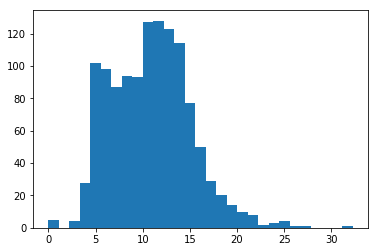

In [37]:
plt.hist(insur_nomiss['handle_time'], bins='auto') 

In [55]:
insur['handle_sum'] = insur['acw'] + insur['inbound_time']

In [57]:
insur['handle_sum'].mean()

10.925947588655154

In [59]:
insur['handle_time'].mean()
#COOL - handle_time=handle_sum

10.925947588707718

In [60]:
np.asarray(insur_nomiss)

array([[29.0, 'FDS', 8.814193156, ..., '11/2/15', 'usw9062aad1',
        121.420721536],
       [30.0, 'FDS', 8.994042867000001, ..., '11/2/15', 'usw9074aad4',
        115.62224001700001],
       [29.0, 'FDS', 10.71379735, ..., '7/24/17', 'usw9022aad8',
        119.63523204],
       ...,
       [30.0, 'SPSO', 18.64271191, ..., '2/2/15', 'usww070yk04',
        116.69670614],
       [30.0, 'SPSO', 34.17765441, ..., '12/14/11', 'uswx067aj01',
        144.8208744],
       [29.0, 'EASO', 22.20111599, ..., '9/18/17', 'uswz010hj01',
        115.95189732]], dtype=object)

In [63]:
insur_trimNomiss = insur_nomiss[['salary', 'unplan_shrink', 'plan_shrink', 'avg_un_ad', 'acw', 'handle_time', 'inbound_time', 'hold_time', 'num_inbound', 'num_outbound', 'cold_trans', 'warm_trans', 'aux_unspec', 'aux_nonphone', 'aux_break', 'aux_pers', 'aux_mtg', 'aux_train', 'aux_corp', 'aux_comp', 'aug_mgmt', 'time_log']]

In [64]:
insur_trimnom2 = insur_nomiss[['salary', 'unplan_shrink', 'plan_shrink', 'avg_un_ad', 'handle_time', 'hold_time', 'num_inbound', 'num_outbound', 'cold_trans', 'warm_trans', 'aux_unspec', 'aux_nonphone', 'aux_break', 'aux_pers', 'aux_mtg', 'aux_train', 'aux_corp', 'aux_comp', 'aug_mgmt', 'time_log']]

In [65]:
insur_trimnom2.head(20)

,salary,unplan_shrink,plan_shrink,avg_un_ad,handle_time,hold_time,num_inbound,num_outbound,cold_trans,warm_trans,aux_unspec,aux_nonphone,aux_break,aux_pers,aux_mtg,aux_train,aux_corp,aux_comp,aug_mgmt,time_log
0,29.0,8.814193,34.013132,78.593396,12.624061,6.735367,701,75,0.855920,6.990014,237.333322,0.000000,1022.066653,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990
1,30.0,8.994043,35.573911,71.054286,10.954637,15.763677,1222,261,4.828151,12.111293,559.966655,157.949996,1487.766655,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990
2,29.0,10.713797,27.673321,81.248113,12.331533,15.185973,1074,304,2.700186,7.728119,2023.883317,0.000000,1641.999985,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650
3,28.0,5.067218,48.948638,90.421489,5.999292,17.884134,1130,34,4.336283,0.265487,11570.083320,46.916663,529.583325,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320
4,29.0,1.898938,67.186997,92.030714,5.211268,16.180222,531,13,4.896422,0.188324,2763.899995,79.416664,273.883330,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329
5,29.0,2.811161,42.063459,83.798333,4.788709,9.669873,1417,3,3.175723,0.000000,15637.449990,44.899999,654.249991,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650
6,30.0,7.629961,60.648407,89.861429,4.654610,13.115598,564,4,3.546099,0.000000,3125.083331,12.650000,244.049996,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996
7,30.0,7.992044,32.330116,88.313333,4.640582,6.401854,2858,177,18.509447,0.699790,639.999986,1417.849989,1865.849983,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650
8,29.0,22.782705,13.858093,69.995455,3.881471,5.886034,698,65,15.616046,0.143266,163.533330,131.266665,214.249997,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995
9,28.0,18.563213,15.555765,81.204545,5.038380,5.690194,1179,97,13.910093,0.424088,219.949996,317.099995,456.299994,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327


In [53]:
y=insur_trimNomiss['handle_time']
X=insur_trimNomiss.drop(['handle_time'], axis=1)

In [54]:
results = sm.OLS(y, X).fit()
#results= sm.OLS(y, X.astype(float)).fit()
results.summary()

#Sig: acw, inbound_time, aux_train

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            handle_time   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.796e+20
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:07:31   Log-Likelihood:                 22341.
No. Observations:                1223   AIC:                        -4.464e+04
Df Residuals:                    1202   BIC:                        -4.453e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
salary          4.26e-12   1.85e-11      0.231      0.818    -3.2e-11    4.05e-11
unplan_shrink  1.099e-11   9.68e-12      1.136      0.256      -8e-12       3e-11
plan_shrink   -2.914e-12   8.64e-12     -0.337      0.736   -1.99e-11     1.4e-11
avg_un_ad      -4.89e-12   5.63e-12     -0.868      0.386   -1.59e-11    6.17e-12
acw               1.0000   5.66e-11   1.77e+10      0.000       1.000       1.000
inbound_time      1.0000   3.48e-11   2.87e+10      0.000       1.000       1.000
hold_time     -3.934e-13   9.28e-12     -0.042      0.966   -1.86e-11    1.78e-11
num_inbound    2.771e-14   1.71e-13      0.162      0.871   -3.07e-13    3.63e-13
num_outbound   6.498e-14   7.04e-13      0.092      0.927   -1.32e-12    1.45e-12
cold_trans     7.163e-12   1.65e-11      0.433      0.665   -2.53e-11    3.96e-11
warm_trans     1.292e-13   2.12e-11      0.006      0.995   -4.15e-11    4.18e-11
aux_unspec     3.005e-14   5.84e-14      0.515      0.607   -8.45e-14    1.45e-13
aux_nonphone    2.05e-14   2.58e-14      0.794      0.428   -3.02e-14    7.12e-14
aux_break      3.078e-13   3.74e-13      0.822      0.411   -4.26e-13    1.04e-12
aux_pers       2.341e-13   3.09e-13      0.758      0.449   -3.72e-13     8.4e-13
aux_mtg         6.66e-14   1.23e-13      0.543      0.588   -1.74e-13    3.07e-13
aux_train      1.411e-13   6.95e-14      2.030      0.043    4.76e-15    2.77e-13
aux_corp       6.282e-16   4.47e-14      0.014      0.989   -8.71e-14    8.84e-14
aux_comp       1.876e-13   4.56e-13      0.412      0.681   -7.06e-13    1.08e-12
aug_mgmt        1.84e-14   1.03e-13      0.178      0.859   -1.84e-13    2.21e-13
time_log      -3.567e-14   2.47e-14     -1.443      0.149   -8.42e-14    1.28e-14
==============================================================================
Omnibus:                       37.041   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.191
Skew:                          -0.097   Prob(JB):                     3.17e-19
Kurtosis:                       4.278   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
y=insur_trimnom2['handle_time']
X=insur_trimnom2.drop(['handle_time'], axis=1)

In [67]:
results = sm.OLS(y, X).fit()
results.summary()

'''
Sig:
salary (+)
unplan (-)
plan(-)
avg_un_ad(+)
hold_time(+)
num_inbound(+)
warm_trans(+)
aux_nonphone(-)
aux_break(-)
aux_mtg(-)
aux_corp(+)
time_log(+)

'''

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            handle_time   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1022.
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:15:58   Log-Likelihood:                -3003.3
No. Observations:                1223   AIC:                             6045.
Df Residuals:                    1204   BIC:                             6142.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
salary            0.2374      0.017     13.897      0.000       0.204       0.271
unplan_shrink    -0.0289      0.009     -3.052      0.002      -0.048      -0.010
plan_shrink      -0.0495      0.009     -5.825      0.000      -0.066      -0.033
avg_un_ad         0.0531      0.005      9.844      0.000       0.043       0.064
hold_time         0.0417      0.009      4.550      0.000       0.024       0.060
num_inbound      -0.0034      0.000    -24.603      0.000      -0.004      -0.003
num_outbound      0.0004      0.001      0.523      0.601      -0.001       0.002
cold_trans       -0.0116      0.016     -0.717      0.474      -0.044       0.020
warm_trans        0.1699      0.020      8.336      0.000       0.130       0.210
aux_unspec     8.203e-05   5.82e-05      1.411      0.159   -3.21e-05       0.000
aux_nonphone     -0.0002    2.5e-05     -7.440      0.000      -0.000      -0.000
aux_break         0.0014      0.000      3.734      0.000       0.001       0.002
aux_pers      -3.411e-05      0.000     -0.111      0.912      -0.001       0.001
aux_mtg          -0.0003      0.000     -2.588      0.010      -0.001   -7.63e-05
aux_train     -8.056e-05   6.92e-05     -1.164      0.245      -0.000    5.52e-05
aux_corp          0.0003   4.38e-05      6.762      0.000       0.000       0.000
aux_comp         -0.0007      0.000     -1.520      0.129      -0.002       0.000
aug_mgmt      -2.103e-05      0.000     -0.204      0.838      -0.000       0.000
time_log       9.637e-05   2.45e-05      3.928      0.000    4.82e-05       0.000
==============================================================================
Omnibus:                      160.976   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1514.635
Skew:                          -0.221   Prob(JB):                         0.00
Kurtosis:                       8.434   Cond. No.                     7.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

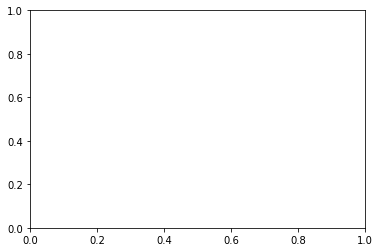

In [19]:
y=insur_nomiss['handle_time']
X=insur_nomiss.drop(['handle_time'], axis=1)